In [165]:
# importing necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings("ignore")

In [166]:
# getting the data.
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [167]:
# dropping the nominal data columns.
df= df.drop(columns=["PassengerId","Name","Ticket","Cabin"])

In [168]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [169]:
# getting the basic information about the columns and their data-type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [170]:
# checking for null values.
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [171]:
# filling the missing values of "Age" column with mean.
df["Age"]= df["Age"].fillna(df["Age"].mean())

# filling the missing values of "Embarked" column with mode.
df["Embarked"]= df["Embarked"].fillna(df["Embarked"].mode()[0])

In [172]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [173]:
# checking for duplicates.
df.duplicated().value_counts()

False    780
True     111
dtype: int64

In [174]:
# dropping the duplicate entries.
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

(780, 8)

In [175]:
# Encoding the categorical data columns into numerical format using the get_dummies method.
df= pd.get_dummies(df,drop_first=True)

In [176]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [177]:
# Let's look at some of the properties of our dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,780.0,0.412821,0.492657,0.00,0.00,0.000000,1.000,1.0000
Pclass,780.0,2.246154,0.854452,1.00,1.00,3.000000,3.000,3.0000
Age,780.0,29.797600,13.708883,0.42,21.75,29.699118,36.000,80.0000
SibSp,780.0,0.525641,0.988046,0.00,0.00,0.000000,1.000,8.0000
Parch,780.0,0.417949,0.838536,0.00,0.00,0.000000,1.000,6.0000
Fare,780.0,34.829108,52.263440,0.00,8.05,15.950000,34.375,512.3292
Sex_male,780.0,0.625641,0.484267,0.00,0.00,1.000000,1.000,1.0000
Embarked_Q,780.0,0.074359,0.262523,0.00,0.00,0.000000,0.000,1.0000
Embarked_S,780.0,0.726923,0.445826,0.00,0.00,1.000000,1.000,1.0000


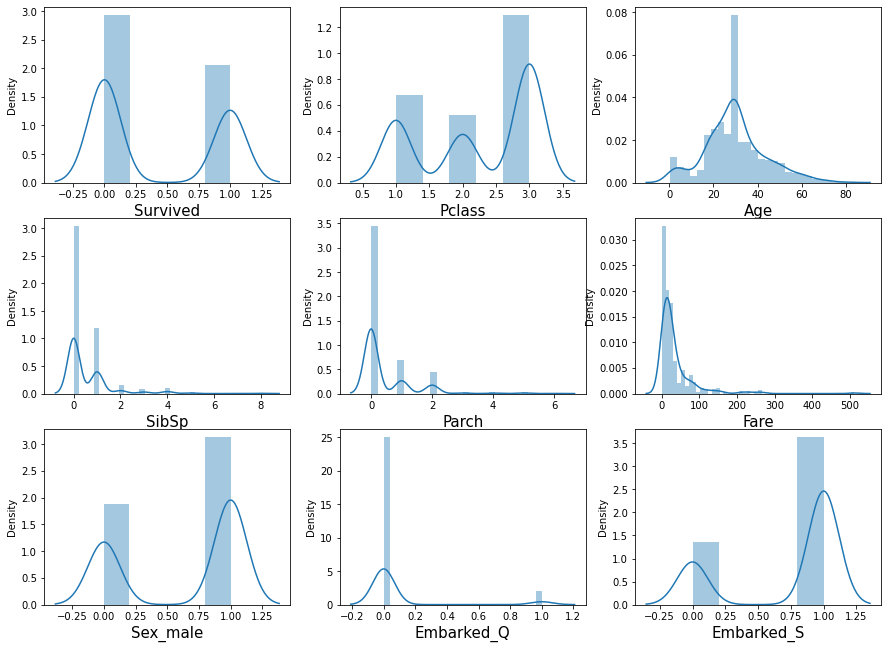

In [178]:
# Let's visualize the data-distribution using distplot.
plt.figure(figsize=(15,11))
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [179]:
# checking the skewness of the data for the continuous data columns i.e. "Age" and "Fare"
df.skew()

# "Fare" column seems to have highly skewed data.

Survived      0.354825
Pclass       -0.494364
Age           0.397400
SibSp         3.046805
Parch         2.624282
Fare          4.561010
Sex_male     -0.520225
Embarked_Q    3.251037
Embarked_S   -1.020607
dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

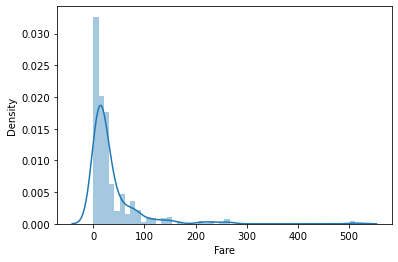

In [180]:
sns.distplot(df["Fare"])

<AxesSubplot:xlabel='Fare'>

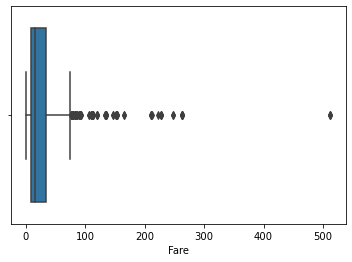

In [181]:
# Let's check the box-plot for "Fare" column.
sns.boxplot(df["Fare"])

In [183]:
# Since our dataset is quite small, I don't want to trim it any further.
# So, let's apply power-transformation on the "Fare" column and see if we can bring the skewness down to an acceptable level.
from sklearn.preprocessing import PowerTransformer

pt= PowerTransformer(method="yeo-johnson")
df["Fare"]= pt.fit_transform(df[["Fare"]])

Skewness: -0.041013733506485385


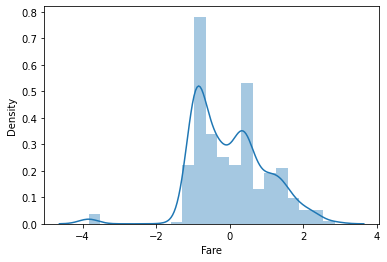

In [184]:
# Skewness and dist-plot after applying power-transformation.
sns.distplot(df["Fare"])
print("Skewness:",df["Fare"].skew())

# Skewness has come down to an acceptable level.

<AxesSubplot:xlabel='Age'>

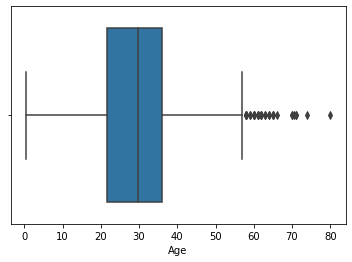

In [185]:
# Let's check the box-plot for "Age" column.
sns.boxplot(df["Age"])

# There seems to be "outliers" but they are real data of people who are aged. It's valueable information in my opinion as
# we can get an idea of survival chances of the elderly people. 
# The skewness of "Age" column is 0.39 which is at an acceptable level. Hence I'm deciding not to delete any record.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

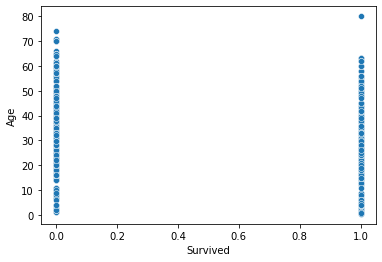

In [186]:
# scatter-plot of "Age" column with the target variable.
sns.scatterplot(x=df["Survived"],y=df["Age"])

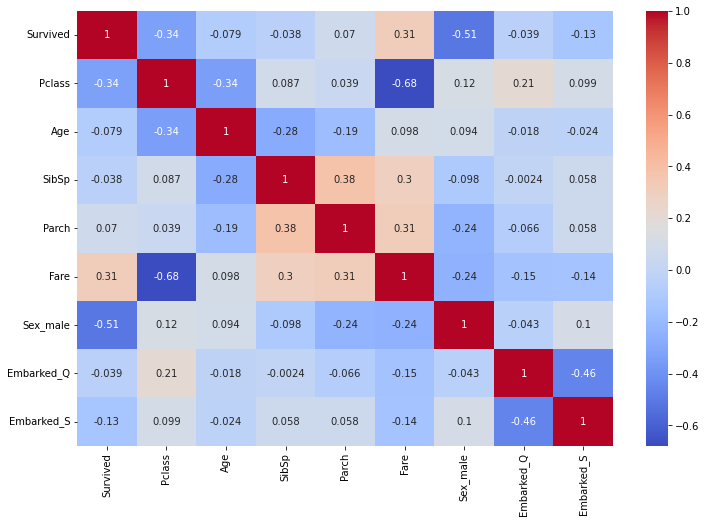

In [187]:
# Let's see the correlation heat-map.
corr= df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot= True, cmap="coolwarm")
plt.show()

# "Fare" and "Pclass" features maybe related. We will check for multicollinearity using vif and take necessary action if needed.

In [188]:
# Lets check the correlation of our columns with the target variable.
correlation= df.corr()
np.abs(correlation["Survived"])

# "SibSp" feature seems to be very weakly related with our target variable.(value<0.05)

Survived      1.000000
Pclass        0.336244
Age           0.079192
SibSp         0.037597
Parch         0.069669
Fare          0.309423
Sex_male      0.513615
Embarked_Q    0.039142
Embarked_S    0.128985
Name: Survived, dtype: float64

In [189]:
# dropping the "SibSp" column.
df.drop(columns=["SibSp"],inplace=True)

In [190]:
# Separating target variable and features.
X= df.drop(columns=["Survived"])
y= df["Survived"]

In [191]:
# Scaling the data using Standard-Scaler.
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [192]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# There doesn't seems to be any multicollinearity problem as all values are within an acceptable range.

        vif    Features
0  2.443465      Pclass
1  1.200805         Age
2  1.330673       Parch
3  2.458923        Fare
4  1.118140    Sex_male
5  1.407048  Embarked_Q
6  1.379983  Embarked_S


In [193]:
############################################## LOGISTIC REGRESSION #############################################################

from sklearn.linear_model import LogisticRegression
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)

    lr= LogisticRegression()
    lr.fit(x_train, y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 76.58
Testing Score for sample 0 : 83.08


Training Score for sample 1 : 78.12
Testing Score for sample 1 : 75.38


Training Score for sample 2 : 76.24
Testing Score for sample 2 : 84.1


Training Score for sample 3 : 76.92
Testing Score for sample 3 : 77.44


Training Score for sample 4 : 78.29
Testing Score for sample 4 : 76.92


Training Score for sample 5 : 77.61
Testing Score for sample 5 : 78.97


Training Score for sample 6 : 77.78
Testing Score for sample 6 : 75.9


Training Score for sample 7 : 76.75
Testing Score for sample 7 : 82.05


Training Score for sample 8 : 77.26
Testing Score for sample 8 : 77.95


Training Score for sample 9 : 77.26
Testing Score for sample 9 : 77.95




In [195]:
############################################## RANDOM FOREST CLASSIFIER ########################################################

from sklearn.ensemble import RandomForestClassifier
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)

    rf= RandomForestClassifier(n_jobs=-1)
    rf.fit(x_train, y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 97.61
Testing Score for sample 0 : 80.51


Training Score for sample 1 : 98.12
Testing Score for sample 1 : 74.36


Training Score for sample 2 : 97.95
Testing Score for sample 2 : 78.46


Training Score for sample 3 : 97.95
Testing Score for sample 3 : 80.51


Training Score for sample 4 : 98.29
Testing Score for sample 4 : 76.41


Training Score for sample 5 : 98.12
Testing Score for sample 5 : 72.31


Training Score for sample 6 : 98.29
Testing Score for sample 6 : 76.92


Training Score for sample 7 : 98.12
Testing Score for sample 7 : 81.54


Training Score for sample 8 : 98.29
Testing Score for sample 8 : 77.95


Training Score for sample 9 : 98.46
Testing Score for sample 9 : 81.54




In [196]:
################################################## KNN CLASSIFIER ##############################################################

from sklearn.neighbors import KNeighborsClassifier
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)
    
    knn= KNeighborsClassifier()
    knn.fit(x_train, y_train)

    y_pred_train = knn.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knn.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")

Training Score for sample 0 : 84.27
Testing Score for sample 0 : 79.49


Training Score for sample 1 : 85.81
Testing Score for sample 1 : 76.41


Training Score for sample 2 : 83.93
Testing Score for sample 2 : 79.49


Training Score for sample 3 : 83.76
Testing Score for sample 3 : 79.49


Training Score for sample 4 : 82.05
Testing Score for sample 4 : 78.46


Training Score for sample 5 : 83.42
Testing Score for sample 5 : 81.03


Training Score for sample 6 : 85.13
Testing Score for sample 6 : 75.9


Training Score for sample 7 : 82.74
Testing Score for sample 7 : 82.56


Training Score for sample 8 : 84.27
Testing Score for sample 8 : 80.0


Training Score for sample 9 : 84.27
Testing Score for sample 9 : 78.97




In [197]:
############################################## SUPPORT VECTOR MACHINE ##########################################################

from sklearn.svm import SVC
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)
    
    svc= SVC()
    svc.fit(x_train, y_train)

    y_pred_train = svc.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= svc.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 80.85
Testing Score for sample 0 : 81.54


Training Score for sample 1 : 82.39
Testing Score for sample 1 : 76.41


Training Score for sample 2 : 80.85
Testing Score for sample 2 : 81.54


Training Score for sample 3 : 81.03
Testing Score for sample 3 : 79.49


Training Score for sample 4 : 80.68
Testing Score for sample 4 : 81.03


Training Score for sample 5 : 81.03
Testing Score for sample 5 : 78.97


Training Score for sample 6 : 81.54
Testing Score for sample 6 : 77.95


Training Score for sample 7 : 81.2
Testing Score for sample 7 : 82.56


Training Score for sample 8 : 80.51
Testing Score for sample 8 : 80.51


Training Score for sample 9 : 81.37
Testing Score for sample 9 : 81.03




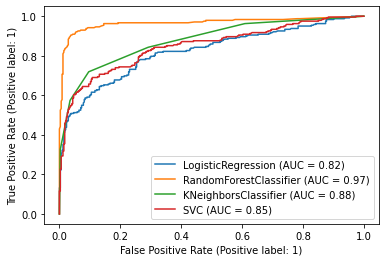

In [205]:
# plotting the roc-auc curves for training data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=0)

disp_train= plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(rf,x_train,y_train, ax=disp_train.ax_)
plot_roc_curve(knn,x_train,y_train, ax=disp_train.ax_)
plot_roc_curve(svc,x_train,y_train, ax=disp_train.ax_)
plt.show()

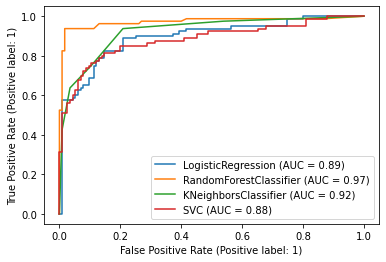

In [206]:
# plotting the roc-auc curves for testing data.

disp_test= plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rf,x_test,y_test, ax=disp_test.ax_)
plot_roc_curve(knn,x_test,y_test, ax=disp_test.ax_)
plot_roc_curve(svc,x_test,y_test, ax=disp_test.ax_)
plt.show()

In [202]:
#Hyperparameter tuning of Random Forests Classifier using GridSearchCV.

params= {"n_estimators": np.arange(50,300,50),
         "max_depth": range(6,10),
         "min_samples_split": range(2,5)
         }
grd_rf= GridSearchCV(rf, param_grid=params,cv=5,n_jobs=-1)
grd_rf.fit(x_train,y_train)
print("Best Parameters:",grd_rf.best_params_)

 
# Taking the best sample split result and applying on the tuned Random Forests model.

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=9)

rf_tuned =grd_rf.best_estimator_
rf_tuned.fit(x_train, y_train)
    
y_pred_train = rf_tuned.predict(x_train)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Training Score:",round(accuracy_train*100,2))

y_pred= rf_tuned.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2),"\n")

print("++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++")
print(classification_report(y_test,y_pred,digits=2))

print("++++++++++++++ CONFUSION MATRIX ++++++++++++++++")
print("\n",confusion_matrix(y_test,y_pred),"\n")

print("++++++++++++++ CROSS VALIDATION ++++++++++++++++","\n")
for i in range(5,10):
    cv_score= cross_val_score(rf_tuned,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

Best Parameters: {'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 200}
Training Score: 85.13
Testing Score: 81.03 

++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       105
           1       0.91      0.66      0.76        90

    accuracy                           0.81       195
   macro avg       0.83      0.80      0.80       195
weighted avg       0.83      0.81      0.81       195

++++++++++++++ CONFUSION MATRIX ++++++++++++++++

 [[99  6]
 [31 59]] 

++++++++++++++ CROSS VALIDATION ++++++++++++++++ 

the cv score for 5 fold: 78.59
the cv score for 6 fold: 78.85
the cv score for 7 fold: 79.36
the cv score for 8 fold: 79.75
the cv score for 9 fold: 78.85


In [201]:
#Hyperparameter tuning of KNN Classifier using GridSearchCV.

params= {"algorithm":["kd_tree","brute"],
         "leaf_size": range(3,10),
         "n_neighbors": [3,5,7,9,11,13]
         }
grd_knn= GridSearchCV(knn, param_grid=params,cv=5,n_jobs=-1)
grd_knn.fit(x_train,y_train)
print("Best Parameters:",grd_knn.best_params_)

 
# Taking the best sample split result and applying on the tuned knn model.

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=7)

knn_tuned =grd_knn.best_estimator_
knn_tuned.fit(x_train, y_train)
    
y_pred_train = knn_tuned.predict(x_train)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Training Score:",round(accuracy_train*100,2))

y_pred= knn_tuned.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2),"\n")

print("++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++")
print(classification_report(y_test,y_pred,digits=2))

print("++++++++++++++ CONFUSION MATRIX ++++++++++++++++")
print("\n",confusion_matrix(y_test,y_pred),"\n")

print("++++++++++++++ CROSS VALIDATION ++++++++++++++++","\n")
for i in range(5,10):
    cv_score= cross_val_score(knn_tuned,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

Best Parameters: {'algorithm': 'kd_tree', 'leaf_size': 4, 'n_neighbors': 11}
Training Score: 81.71
Testing Score: 81.54 

++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.86      0.72      0.78        90

    accuracy                           0.82       195
   macro avg       0.82      0.81      0.81       195
weighted avg       0.82      0.82      0.81       195

++++++++++++++ CONFUSION MATRIX ++++++++++++++++

 [[94 11]
 [25 65]] 

++++++++++++++ CROSS VALIDATION ++++++++++++++++ 

the cv score for 5 fold: 77.56
the cv score for 6 fold: 78.08
the cv score for 7 fold: 77.95
the cv score for 8 fold: 78.08
the cv score for 9 fold: 77.57


In [203]:
#Hyperparameter tuning of SVC using GridSearchCV.

params= {"C": [1,3,5,10] ,
         "gamma": [0.001,0.01,0.1,1] ,
         "kernel":["rbf","poly"]
        }
grd_svc= GridSearchCV(svc, param_grid=params,cv=5,n_jobs=-1)
grd_svc.fit(x_train,y_train)
print("Best Parameters:",grd_svc.best_params_)


# Taking the best sample split result and applying on the tuned SVC model.

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=7)
svc_tuned =grd_svc.best_estimator_
svc_tuned.fit(x_train, y_train)
    
y_pred_train = svc_tuned.predict(x_train)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Training Score:",round(accuracy_train*100,2))

y_pred= svc_tuned.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2),"\n")

print("++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++")
print(classification_report(y_test,y_pred,digits=2))

print("++++++++++++++ CONFUSION MATRIX ++++++++++++++++")
print("\n",confusion_matrix(y_test,y_pred),"\n")

print("++++++++++++++ CROSS VALIDATION ++++++++++++++++","\n")
for i in range(5,10):
    cv_score= cross_val_score(svc_tuned,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

Best Parameters: {'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Training Score: 81.71
Testing Score: 81.03 

++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       105
           1       0.95      0.62      0.75        90

    accuracy                           0.81       195
   macro avg       0.85      0.80      0.80       195
weighted avg       0.84      0.81      0.80       195

++++++++++++++ CONFUSION MATRIX ++++++++++++++++

 [[102   3]
 [ 34  56]] 

++++++++++++++ CROSS VALIDATION ++++++++++++++++ 

the cv score for 5 fold: 78.21
the cv score for 6 fold: 80.13
the cv score for 7 fold: 79.1
the cv score for 8 fold: 79.74
the cv score for 9 fold: 78.98


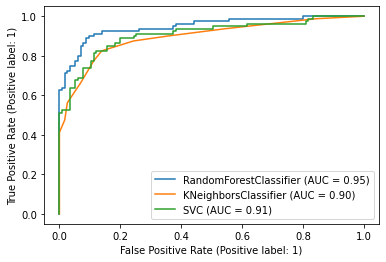

In [207]:
# plotting the roc-auc curves for testing data.

disp_test= plot_roc_curve(rf_tuned,x_test,y_test)
plot_roc_curve(knn_tuned,x_test,y_test, ax=disp_test.ax_)
plot_roc_curve(svc_tuned,x_test,y_test, ax=disp_test.ax_)
plt.show()

In [208]:
# Random-Forests Algorithm is giving the highest AUC score.
# saving the model using pickle.
import pickle 

Titanic= "Titanic_final_model.pickle"
pickle.dump(rf_tuned, open(Titanic,'wb'))